<a href="https://colab.research.google.com/github/lmquann/leminhquan/blob/main/ptdl__24_3_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BÀI TẬP: Bạn hãy tìm hiểu về hệ số tương quan (correlation), cách đọc và giải thích ý nghĩa hệ số tương quan.

   Một cách để định lượng mối quan hệ giữa hai biến là sử dụng hệ số tương quan Pearson, là thước đo liên kết tuyến tính giữa hai biến. Nó luôn có giá trị từ -1 đến 1 trong đó:

+ -1 chỉ ra mối tương quan tuyến tính hoàn toàn tiêu cực giữa hai biến

+ 0 cho thấy không có mối tương quan tuyến tính giữa hai biến

+ 1 chỉ ra mối tương quan tuyến tính hoàn toàn tích cực giữa hai biến


  Hệ số tương quan càng xa từ 0, mối quan hệ giữa hai biến càng mạnh.

+ Cách tính hệ số tương quan: 

Dùng hàm corrcoef() trong Numpy để tính mối tương quan giữa 2 biến 

In [ ]:
#Ví dụ: 
import numpy as np
np.random.seed(100)
#tạo 1 mảng ngẫu nhiên 
var1 = np.random.randint(0, 10, 50)
#tạo ra một mảng tương quan tích cực với một mảng ngẫu nhiên 
var2 = var1 + np.random.normal(0, 10, 50)
#tính hệ só tương quan giữa 2 mảng 
np.corrcoef(var1, var2)

array([[1.       , 0.3350184],
       [0.3350184, 1.       ]])

   => Hệ số tương quan giữa hai biến này là 0,335, đó là một mối tương quan tích cực.

Dùng hàm pearsonr() trong Scipy để kiểm tra xem mối tương quan này có ý nghĩa thống kê hay không, ta tính toán p-value liên quan đến hệ số tương quan Pearson, nó sẽ trả về hệ số tương quan Pearson cùng với p-value hai mẫu

In [ ]:
from scipy.stats.stats import pearsonr

pearsonr(var1, var2)

(0.33501839763857016, 0.017397558087782913)

  => Hệ số tương quan là 0,335 và p-value hai mẫu là 0,017, p-value < 0,05, ta sẽ kết luận rằng có một mối tương quan có ý nghĩa thống kê giữa hai biến.

Dùng hàm .corr() trong pandas để tính tính mối tương quan giữa một số biến trong 1 Pandas DataFrame

In [ ]:
#Ví dụ 
import pandas as pd
data = pd.DataFrame(np.random.randint(0, 10, size=(5, 3)), columns=['A', 'B', 'C'])
#tính toán hệ số tương quan cho tất cả các tổ hợp theo cặp
data.corr()

,A,B,C
A,1.000000,-0.265690,0.563543
B,-0.265690,1.000000,-0.075858
C,0.563543,-0.075858,1.000000


In [ ]:
#Tính toán mối tương quan giữa hai biến cụ thể
data['A'].corr(data['B'])

-0.2656898736119089

Có một số thống kê mà bạn có thể sử dụng để định lượng mối tương quan.  Có ba hệ số tương quan:
+ Pearson’s r
+ Spearman’s ρ (rho)
+ Kendall’s τ (tau)

Hệ số Pearson đo lường mối tương quan tuyến tính, trong khi hệ số Spearman và Kendall so sánh thứ hạng dữ liệu



++ Pearson - mối tương quan tuyến tính :  có thể được sử dụng để tóm tắt cường độ của mối quan hệ tuyến tính giữa hai mẫu dữ liệu.

Một số điều kiện cần cho mối tương quan Pearson: 

+ Các biến x và y phải có mối quan hệ tuyến tính.

+ Cả hai biến x và y phải là số (hoặc định lượng). Đó là, chúng phải đại diện cho các phép đo mà không có giới hạn về mức độ chính xác của chúng. 

+ Các giá trị y phải có một phân bố bình thường cho mỗi x, với cùng một phương sai ở mỗi x.


Hệ số tương quan của Pearson được tính như là tính hiệp biến(covariance) của hai biến chia cho sản phẩm của độ lệch chuẩn của mỗi mẫu dữ liệu.

Hệ số tương quan cho biết: 
+ Dần tới +1: mối tương quan tích cực càng lớn 
+ Dần tới -1: mối tương quan tiêu cực càng lớn 
+ 0: không có mối tương quan 

Hệ số tương quan Pearson có thể được sử dụng để đánh giá mối quan hệ giữa nhiều hơn hai biến.

EXAMPLE: 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

Tải dữ liệu

In [2]:
data = pd.read_csv('/content/House Price.csv')
data.shape

(1460, 81)

mô tả 'Sales Price'

In [3]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Vẽ histogram

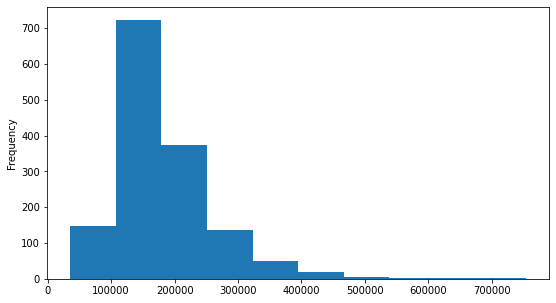

In [4]:
plt.figure(figsize = (9, 5))
data['SalePrice'].plot(kind ="hist")

Vẽ ma trận hệ số tương quan

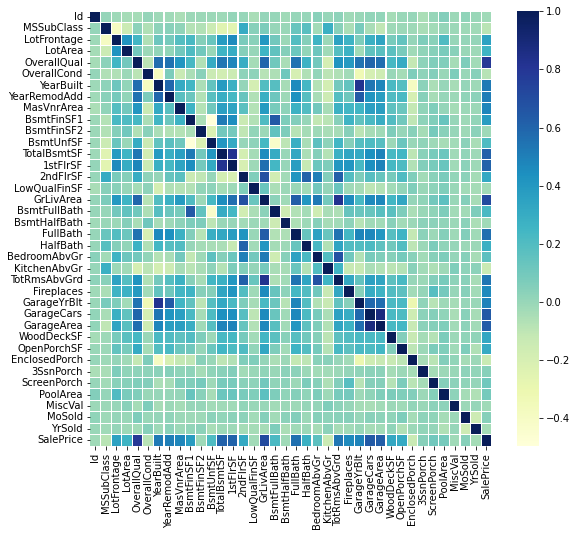

In [5]:
corrmat = data.corr()
  
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)